## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Functions

In [2]:
def file(n):
    path = 'Results_Grain_Growth/'
    name = path +'T025_GrainGrowth_korn_' + str(n) + '.txt'
    f = open(name)
    a = []
    for x in f:
        if x[0]!='#':
            a.append(x.split()) #appends output into the list 'a'
            #x.split()-splits  into strings where separated with spaces

    korn_map = np.asarray(a).astype('int64')
    return korn_map

In [3]:
def triple_point(korn_map):
    korn_map_padded = np.pad(korn_map, 1, mode='constant')
    #adds a zero as a padding to initial and final index, 1 stands for padding thickness
    xlim = np.shape(korn_map_padded)[0]
    #length of major array
    ylim = np.shape(korn_map_padded)[1]
    
    J_gids   = []
    J_points = []
    #Selection of a 3x3 matrix to scan for triple common grain point
    for i in range(1,xlim-1):
      for j in range(1,ylim-1):
        masked_korn_map = korn_map_padded[i-1:i+2,j-1:j+2] #array[initial_index:final_index]

        #print(masked_korn_map)
        #a=[22,23,24,25]
        #a[0]=22(answerrr)
        #a[0:1]=[22](answerrr)
        #a[0:2]=[22,23](answerrr)  ---counts spaces between as a index starts from the space before the inital value
        neighbors_uniq  = list(np.unique(masked_korn_map))
        #assigns the maps containing unique array elements to a lists
        if neighbors_uniq[0] == 0:
          neighbors_uniq.remove(0)
        if len(neighbors_uniq)>2:
          J_points.append([i,j])
          J_gids.append(neighbors_uniq)
            
    J_gids_unique = []
    J_points_unique = []
    for i in range(len(J_gids)):
      if J_gids[i] not in J_gids_unique:
        J_gids_unique.append(J_gids[i])
        J_points_unique.append(J_points[i])
    J_points_unique = np.array(J_points_unique)
    t1, t2 = J_points_unique[:,1].copy() , J_points_unique[:,0].copy()
    J_points_unique[:,0], J_points_unique[:,1] = t1, t2

    return J_gids_unique, J_points_unique
    

In [4]:
def adj_matrix_fn(J_gids_unique):
    adj_matrix = np.zeros((len(J_gids_unique),len(J_gids_unique)))

    for i in range(len(J_gids_unique)):
      for j in range(len(J_gids_unique)):
        if i!=j and len(list(set(J_gids_unique[i]).intersection(J_gids_unique[j])))>=2:
          adj_matrix[i,j] = 1
    return adj_matrix

## Test Example

In [24]:
f = file(30)
f

array([[113, 113, 113, ...,  29,  29,  29],
       [113, 113, 113, ...,  29,  29,  29],
       [113, 113, 113, ...,  29,  29,  29],
       ...,
       [ 81,  81,  81, ..., 188, 188, 188],
       [ 81,  81,  81, ..., 188, 188, 188],
       [ 81,  81,  81, ..., 188, 188, 188]])

In [25]:
a,b = triple_point(f)

In [26]:
c = adj_matrix_fn(a)
c

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
b = np.array(b)
#b[:,0], b[:,1] = b[:,1].copy(), b[:,0].copy()

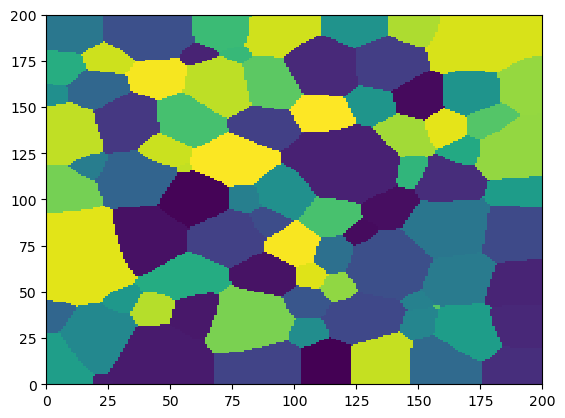

In [28]:
fi = str(f) + '.csv'
plt.pcolor(f)
plt.savefig("Images/grain_30.png")

plt.show() 

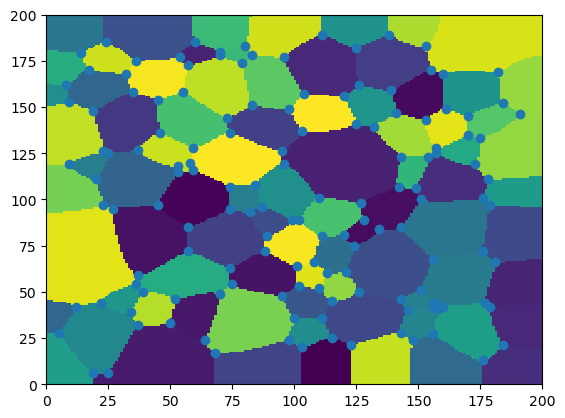

In [29]:

#fig = plt.figure()
#ax = fig.add_subplot()
fi = str(f) + '.csv'
plt.pcolor(f)
plt.scatter(b[:,0], b[:,1])
plt.savefig("Images/tp_and_grain_30.png")

plt.show()              

In [30]:
edge = np.array(np.where(c == 1))
_, l = len(edge), len(np.transpose(edge))
new = np.sort(np.transpose(edge))

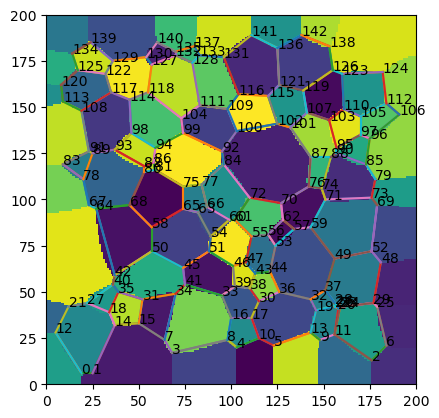

In [31]:
#new
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(b[:,0], b[:,1])
plt.pcolor(f)
for i in range(len(b)):
    plt.annotate(i,[b[i,0],b[i,1]])
for i in range(l):
    val1 = [b[new[i,0],1], b[new[i,1],1]]
    val2 = [b[new[i,0],0], b[new[i,1],0]]
    #print(val1,val2)
    #print("\n")
    ax.plot(val2,val1)
    #plt.show()
ax.set_aspect('equal', adjustable='box')
plt.savefig("Images/tp_bound_grain_30.png")
plt.show()              

## Saving files

In [52]:
path_tp = 'Triple_points_pos/'
path_adj = 'Adj_matrix/'
korn_map = {}
J_points = {}
adj = {}
print('Creating and saving files...')
for i in range(1,60):
    name = str(i) + '.txt'
    name_tp = path_tp + name
    name_adj = path_adj + name
    korn_map[i] = file(i)
    J_gids, J_points[i] = triple_point(korn_map[i])
    adj[i] = adj_matrix_fn(J_gids)
    

    
    #saving files
    np.savetxt(name_tp, J_points[i])
    np.savetxt(name_adj, adj[i])
print('Process complete')

Creating and saving files...
Process complete
